#### Import the SQL database into Pandas

In [1]:
from sqlalchemy import create_engine
# from sqlalchemy import Column, Integer, String, Float
import pandas as pd
# import os

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [2]:
dbuser = 'postgres'
dbpassword = 'HEYgirl406'
dbhost = 'localhost'
dbport = '5432'
dbname= 'Employee_Database'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")
Base.metadata.create_all(engine)

In [3]:
df = pd.read_sql_query('SELECT * FROM salaries',engine)
df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


#### Create a histogram to visualize the most common salary ranges for employees

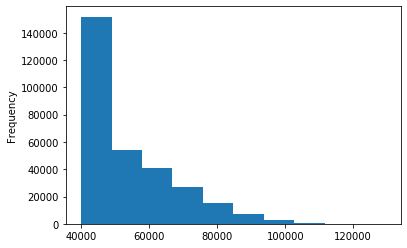

In [7]:
graph = df['salary'].plot.hist()

#### Create a bar chart of average salary by title

In [5]:
salary = pd.read_sql_query('SELECT * FROM salaries',engine)
titles = pd.read_sql_query('SELECT * FROM titles',engine)

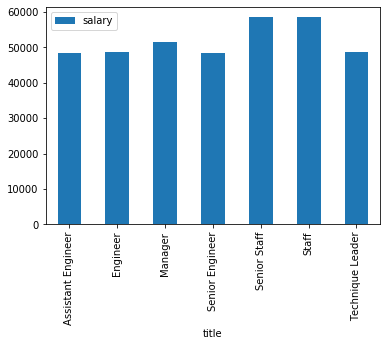

In [6]:
ave = titles.merge(salary, on='emp_no').groupby('title').mean()
ave_df = pd.DataFrame(ave['salary'])
ave_df.plot.bar()